In [1]:
import model.build_model as bm
import pandas as pd

raised = "data/raised_hand_data.csv"
clap = "data/clap_data.csv"
clap_1 = "data/clap_data_1.csv"

raised_df = pd.read_csv(raised) 
clap_df = pd.read_csv(clap)
clap_1_df = pd.read_csv(clap_1)

raised_df = bm.transform(raised_df, "raise")
clap_df = bm.transform(clap_df, "clap")
clap_1_df = bm.transform(clap_1_df, "clap")

df = bm.connect_df(raised_df, clap_1_df)
df

,x_mean,y_mean,z_mean,x_max,y_max,z_max,x_min,y_min,z_min,x_pca,...,y_seg_slope_1,y_seg_slope_2,y_seg_slope_3,y_seg_slope_4,z_seg_slope_0,z_seg_slope_1,z_seg_slope_2,z_seg_slope_3,z_seg_slope_4,target
0,0.158285,-0.661852,0.247002,1.269775,-0.009766,0.526856,-0.392090,-0.863281,-0.209961,2.150326,...,-0.016748,0.028638,0.069214,0.060913,0.129468,0.001050,-0.012402,-0.168945,-0.026001,1
1,0.069300,-0.702745,0.175094,1.379883,-0.072510,0.445557,-0.461182,-0.850342,-1.984375,2.786584,...,-0.003843,-0.000366,0.022827,0.135010,0.105636,0.010470,0.007520,-0.019165,-0.232935,1
2,0.039678,-0.767002,0.232617,1.374512,-0.086182,0.375000,-0.319824,-0.917969,-0.147949,2.037001,...,0.006567,-0.002344,0.049438,0.172534,0.056348,0.006348,0.022876,-0.023950,-0.023145,1
3,0.130127,-0.722070,0.191182,1.422119,-0.009766,0.395264,-0.390625,-0.922607,-0.360840,2.328072,...,-0.005933,-0.000610,0.064136,0.188062,0.098633,0.001416,0.003101,-0.062646,-0.014941,1
4,0.107617,-0.773662,0.124414,1.231934,0.038330,0.383545,-1.047363,-0.963623,-1.553223,2.443050,...,0.007617,0.002710,0.047363,0.165381,0.090674,-0.004785,0.003247,-0.007202,-0.147461,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.075414,-0.610827,-0.811369,1.202637,-0.017578,-0.062256,-0.836182,-1.300049,-1.984375,2.705474,...,-0.098096,-0.272632,0.058081,0.582886,-0.151489,0.062842,-0.250317,0.025708,0.175293,0
94,0.069525,-0.699496,-0.577351,1.111572,-0.000244,1.999939,-0.848877,-1.984375,-1.405273,2.586863,...,0.141553,-0.087085,0.361523,0.322192,-0.086646,0.062793,0.279028,-0.792267,0.425757,0
95,0.086169,-0.673520,-0.578099,1.109375,-0.039307,1.249756,-0.652344,-1.984375,-1.222412,2.000351,...,0.087964,-0.491968,0.036890,0.288208,-0.003394,-0.134619,0.664063,0.022778,0.208130,0
96,0.191663,-0.577295,-0.620056,1.199707,-0.048828,0.083984,-0.510254,-0.987061,-1.073975,2.124384,...,-0.045679,0.066113,0.036108,0.170410,-0.146313,0.053564,-0.195703,-0.070972,0.217700,0


<AxesSubplot:xlabel='x_mean', ylabel='Count'>

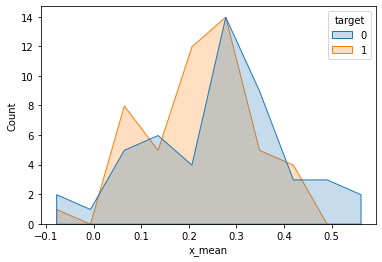

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt, mpld3
sns.histplot(data=df, x='x_mean', hue='target', element='poly')

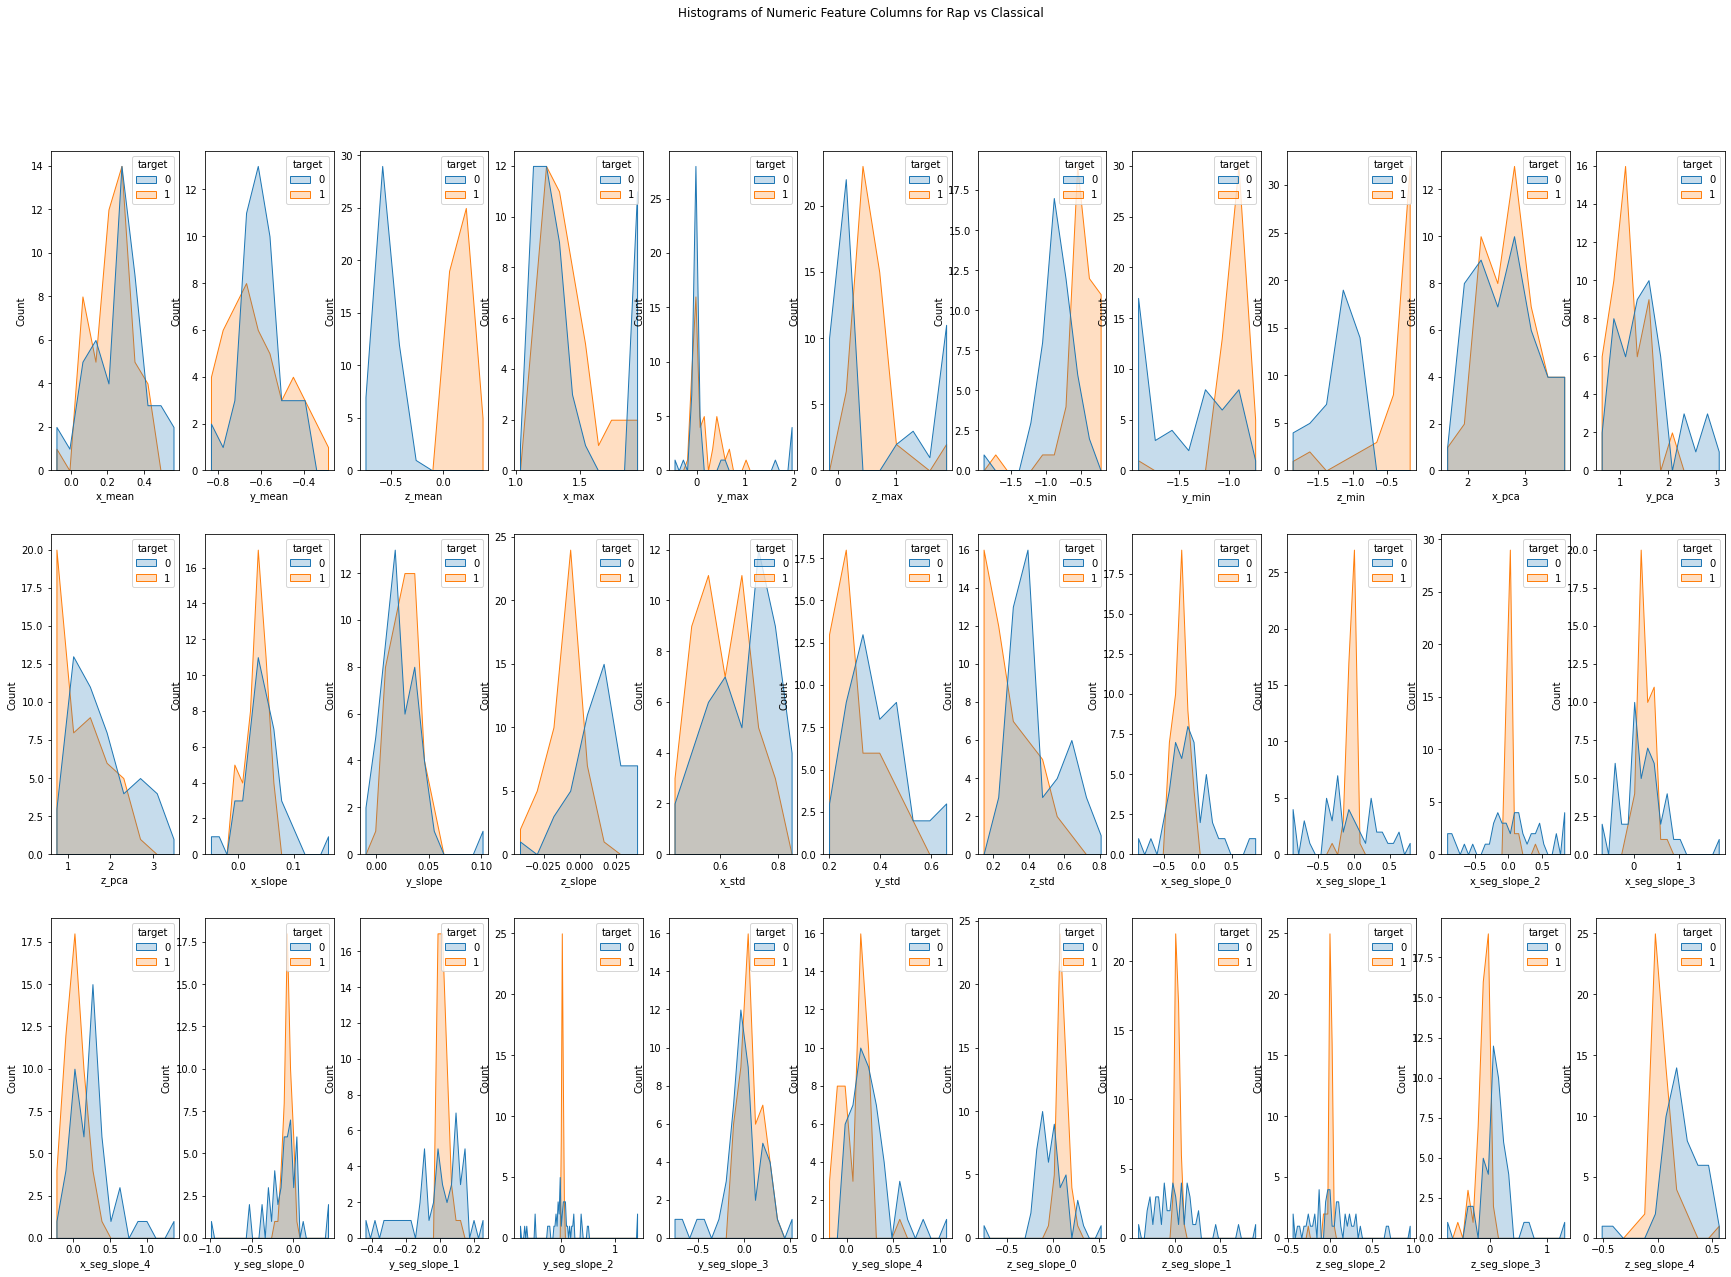

In [4]:
fig, axes = plt.subplots(3, 11, figsize=(30, 20))
fig.suptitle('Histograms of Numeric Feature Columns for Rap vs Classical')  

cnt = 0
for i in range(3):
    for j in range(11):
        sns.histplot(ax=axes[i, j], data=df, x=df.columns[cnt], hue="target", element='poly')
        cnt += 1

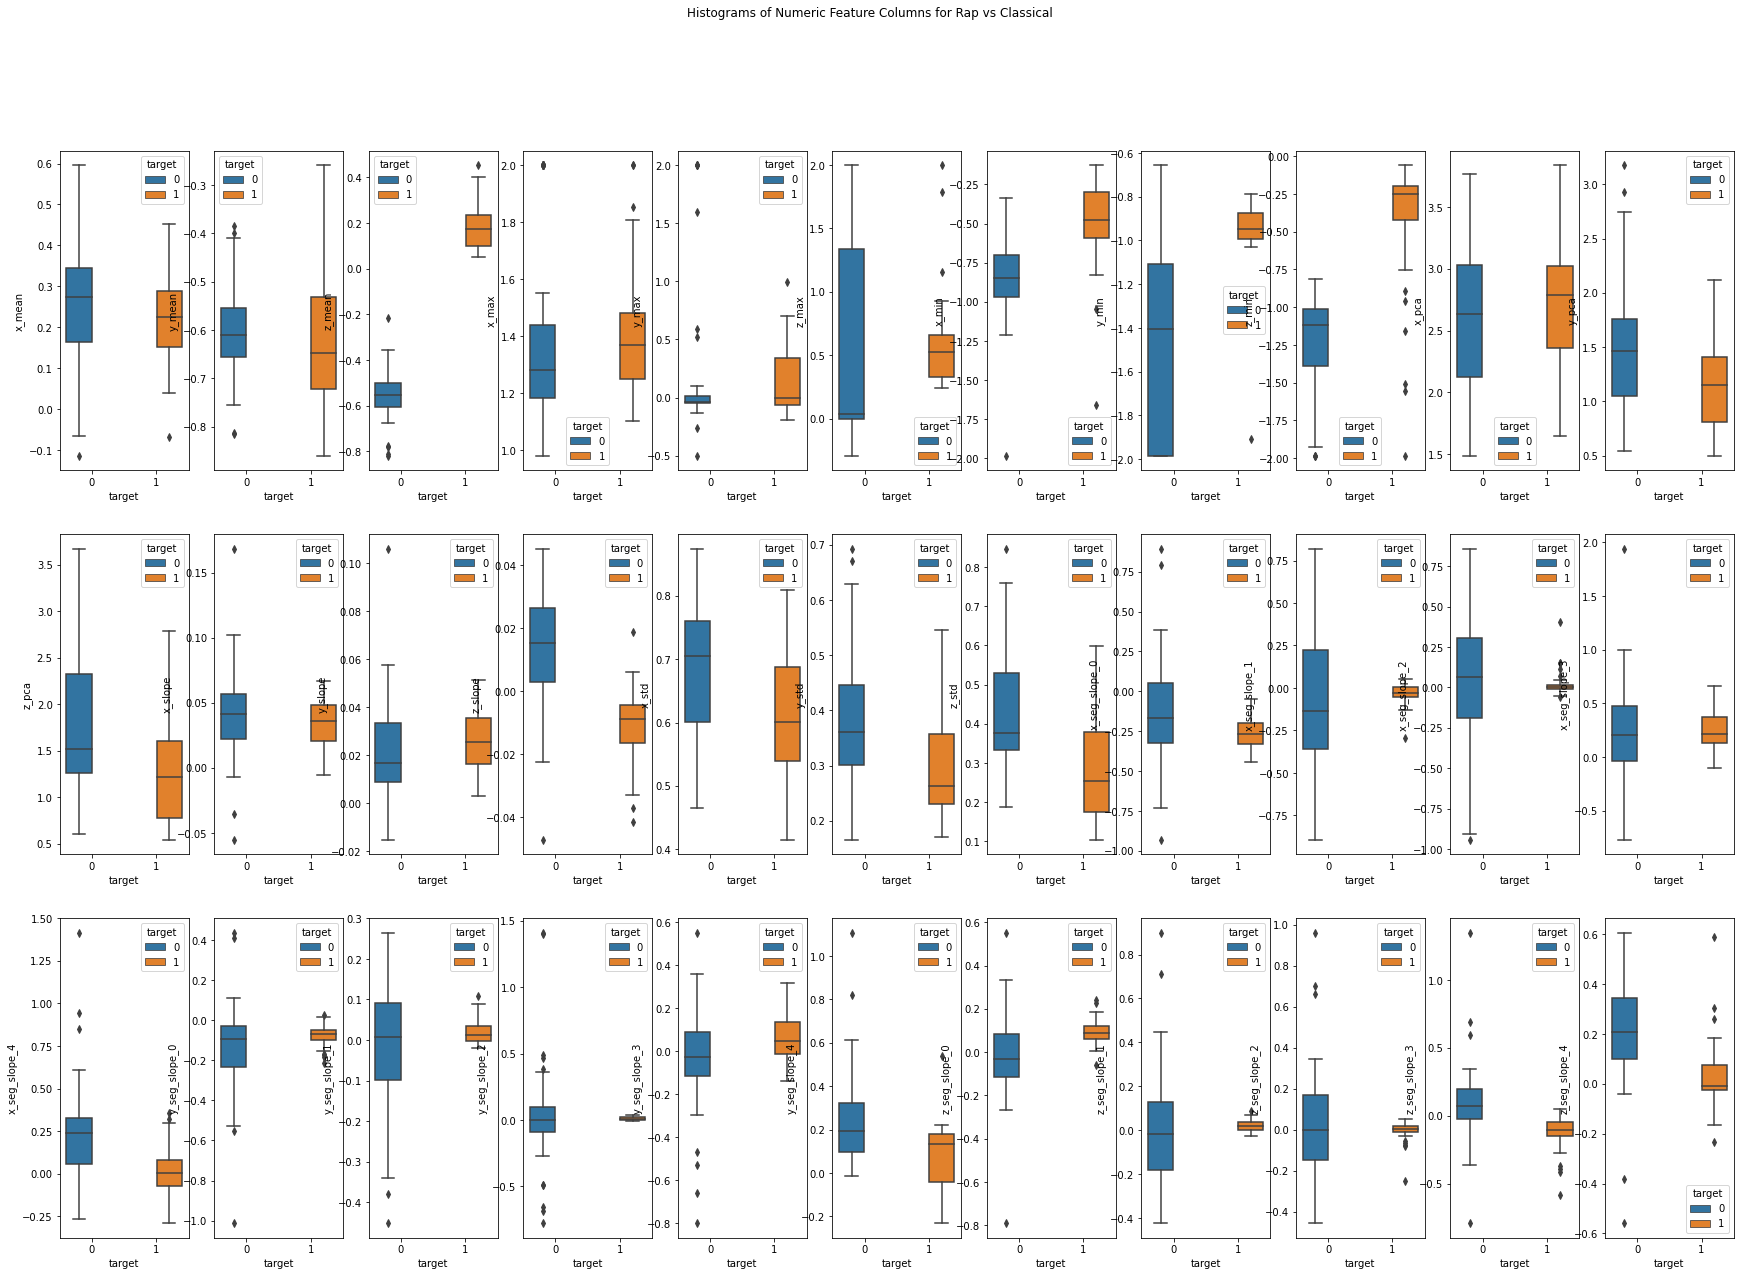

In [5]:
fig, axes = plt.subplots(3, 11, figsize=(30, 20))
fig.suptitle('Histograms of Numeric Feature Columns for Rap vs Classical')  

cnt = 0
for i in range(3):
    for j in range(11):
        sns.boxplot(ax=axes[i, j], data=df, x='target', y=df.columns[cnt], hue="target")
        cnt += 1

In [6]:
import plotly.express as px
data = df.corr()
fig = px.imshow(data,text_auto=True, width=800, height=800)
fig

In [15]:
best_features = df.corr()['target'].to_frame()
bf = best_features[abs(best_features['target']) > .4]
bf.index

Index(['z_mean', 'x_min', 'y_min', 'z_min', 'z_slope', 'z_std',
       'x_seg_slope_4', 'y_seg_slope_4', 'z_seg_slope_3', 'z_seg_slope_4',
       'target'],
      dtype='object')

In [16]:
df[bf.index]

,z_mean,x_min,y_min,z_min,z_slope,z_std,x_seg_slope_4,y_seg_slope_4,z_seg_slope_3,z_seg_slope_4,target
0,0.247002,-0.392090,-0.863281,-0.209961,-0.016488,0.221636,-0.069702,0.060913,-0.168945,-0.026001,1
1,0.175094,-0.461182,-0.850342,-1.984375,-0.018459,0.474225,0.087232,0.135010,-0.019165,-0.232935,1
2,0.232617,-0.319824,-0.917969,-0.147949,-0.010620,0.152373,0.255640,0.172534,-0.023950,-0.023145,1
3,0.191182,-0.390625,-0.922607,-0.360840,-0.012243,0.204572,0.079785,0.188062,-0.062646,-0.014941,1
4,0.124414,-1.047363,-0.963623,-1.553223,-0.019993,0.381685,-0.102905,0.165381,-0.007202,-0.147461,1
...,...,...,...,...,...,...,...,...,...,...,...
93,-0.811369,-0.836182,-1.300049,-1.984375,-0.003188,0.412622,0.237183,0.582886,0.025708,0.175293,0
94,-0.577351,-0.848877,-1.984375,-1.405273,0.027680,0.658711,0.473682,0.322192,-0.792267,0.425757,0
95,-0.578099,-0.652344,-1.984375,-1.222412,0.039788,0.528869,0.426392,0.288208,0.022778,0.208130,0
96,-0.620056,-0.510254,-0.987061,-1.073975,0.018767,0.318180,0.395508,0.170410,-0.070972,0.217700,0
